<a href="https://colab.research.google.com/github/Shatakshi01/House_Price/blob/main/HousePricePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Banglore_df = pd.read_csv("/content/drive/MyDrive/House Price Prediction/dataset/Bangalore.csv")
Chennai_df = pd.read_csv("/content/drive/MyDrive/House Price Prediction/dataset/Chennai.csv")
Delhi_df = pd.read_csv("/content/drive/MyDrive/House Price Prediction/dataset/Delhi.csv")
Hyderabad_df = pd.read_csv("/content/drive/MyDrive/House Price Prediction/dataset/Hyderabad.csv")
Kolkata_df = pd.read_csv("/content/drive/MyDrive/House Price Prediction/dataset/Kolkata.csv")
Mumbai_df = pd.read_csv("/content/drive/MyDrive/House Price Prediction/dataset/Mumbai.csv")

dataset = [Banglore_df , Chennai_df , Delhi_df , Hyderabad_df , Kolkata_df , Mumbai_df]

In [4]:
print("NO. OF ROWS IN EACH CSV FILE ")
print("Banglore_df--->" , len(Banglore_df))
print("Chennai_df--->" , len(Chennai_df))
print("Delhi_df--->" , len(Delhi_df))
print("Hyderabad_df--->" , len(Hyderabad_df))
print("Kolkata_df--->" , len(Kolkata_df))
print("Mumbai_df--->" , len(Mumbai_df))
print("Total-->" , len(Banglore_df) + 
      len(Chennai_df) + len(Delhi_df) +
      len(Hyderabad_df) + len(Kolkata_df)+
      len(Mumbai_df))

NO. OF ROWS IN EACH CSV FILE 
Banglore_df---> 6207
Chennai_df---> 5014
Delhi_df---> 4998
Hyderabad_df---> 2518
Kolkata_df---> 6507
Mumbai_df---> 7719
Total--> 32963


In [5]:
Banglore_df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [6]:
Delhi_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                4998 non-null   int64 
 1   Area                 4998 non-null   int64 
 2   Location             4998 non-null   object
 3   No. of Bedrooms      4998 non-null   int64 
 4   Resale               4998 non-null   int64 
 5   MaintenanceStaff     4998 non-null   int64 
 6   Gymnasium            4998 non-null   int64 
 7   SwimmingPool         4998 non-null   int64 
 8   LandscapedGardens    4998 non-null   int64 
 9   JoggingTrack         4998 non-null   int64 
 10  RainWaterHarvesting  4998 non-null   int64 
 11  IndoorGames          4998 non-null   int64 
 12  ShoppingMall         4998 non-null   int64 
 13  Intercom             4998 non-null   int64 
 14  SportsFacility       4998 non-null   int64 
 15  ATM                  4998 non-null   int64 
 16  ClubHo

In [7]:
print(Mumbai_df.columns)

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')


In [8]:
Delhi_df.head(5)


,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [9]:
col_lis = Mumbai_df.columns.drop(['Price', 'Area', 'Location'])
col_lis

Index(['No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium',
       'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator'],
      dtype='object')

In [10]:
print("before=>" , Delhi_df.shape[0])
Delhi_df.replace(9,np.nan,inplace=True)
Delhi_df.dropna(axis=0,how="any",inplace=True)
print("after=>" , Delhi_df.shape[0])

before=> 4998
after=> 2002


In [11]:
for i in col_lis:
  print(i , " --> " , Delhi_df[i].unique())
  
  

No. of Bedrooms  -->  [2 3 4 1 5]
Resale  -->  [1 0]
MaintenanceStaff  -->  [0. 1.]
Gymnasium  -->  [1. 0.]
SwimmingPool  -->  [0. 1.]
LandscapedGardens  -->  [0. 1.]
JoggingTrack  -->  [1. 0.]
RainWaterHarvesting  -->  [0. 1.]
IndoorGames  -->  [0. 1.]
ShoppingMall  -->  [0. 1.]
Intercom  -->  [1. 0.]
SportsFacility  -->  [1. 0.]
ATM  -->  [0. 1.]
ClubHouse  -->  [0. 1.]
School  -->  [0. 1.]
24X7Security  -->  [1. 0.]
PowerBackup  -->  [1. 0.]
CarParking  -->  [1. 0.]
StaffQuarter  -->  [0. 1.]
Cafeteria  -->  [0. 1.]
MultipurposeRoom  -->  [0. 1.]
Hospital  -->  [0. 1.]
WashingMachine  -->  [0. 1.]
Gasconnection  -->  [1. 0.]
AC  -->  [0. 1.]
Wifi  -->  [0.]
Children'splayarea  -->  [1. 0.]
LiftAvailable  -->  [1. 0.]
BED  -->  [0. 1.]
VaastuCompliant  -->  [1. 0.]
Microwave  -->  [0. 1.]
GolfCourse  -->  [0.]
TV  -->  [0. 1.]
DiningTable  -->  [0. 1.]
Sofa  -->  [0. 1.]
Wardrobe  -->  [0.]
Refrigerator  -->  [0. 1.]


In [12]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
print("imported.....")

imported.....


In [13]:
Delhi_df.rename(columns={"No. of Bedrooms":"Bedrooms", "24X7Security":"Security","Children'splayarea":"Playarea" , "LiftAvailable":"Lift" ,"VaastuCompliant":"Vaastu", }, inplace=True)

In [14]:
Delhi_df.columns

Index(['Price', 'Area', 'Location', 'Bedrooms', 'Resale', 'MaintenanceStaff',
       'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', 'Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Playarea', 'Lift', 'BED', 'Vaastu', 'Microwave', 'GolfCourse',
       'TV', 'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [15]:
Delhi_df["Price"] = round(Delhi_df["Price"]/100000 , 2)
Delhi_df["Price"]

0       105.0
1        60.0
2       150.0
3        25.0
4        58.0
        ...  
1997     90.0
1998    120.0
1999    160.0
2000    116.0
2001    136.0
Name: Price, Length: 2002, dtype: float64

In [16]:
Delhi_df.rename(columns={"Price": "Price inn lkhs" } , inplace =True)
Delhi_df.columns

Index(['Price inn lkhs', 'Area', 'Location', 'Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School', 'Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Playarea', 'Lift', 'BED', 'Vaastu', 'Microwave', 'GolfCourse',
       'TV', 'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

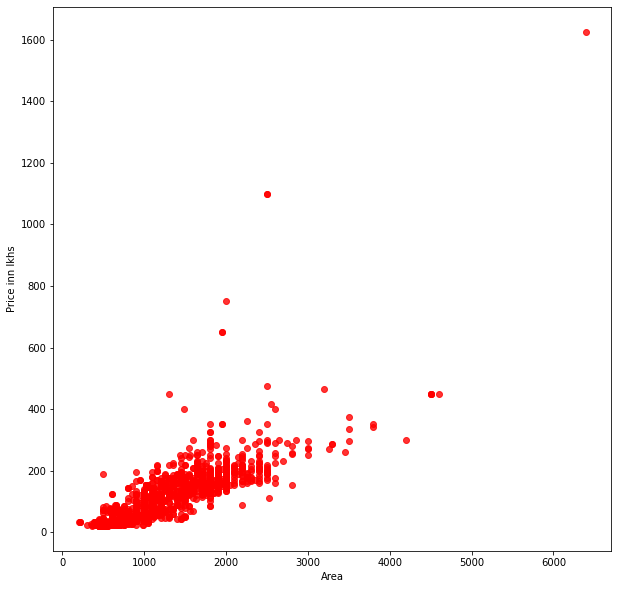

In [17]:
y1=Delhi_df[ "Price inn lkhs"]
fig1 = plt.subplots(figsize=(10,10))
fig1 = sns.regplot(x="Area",y=y1,data=Delhi_df,fit_reg=False , color='red')
fig1

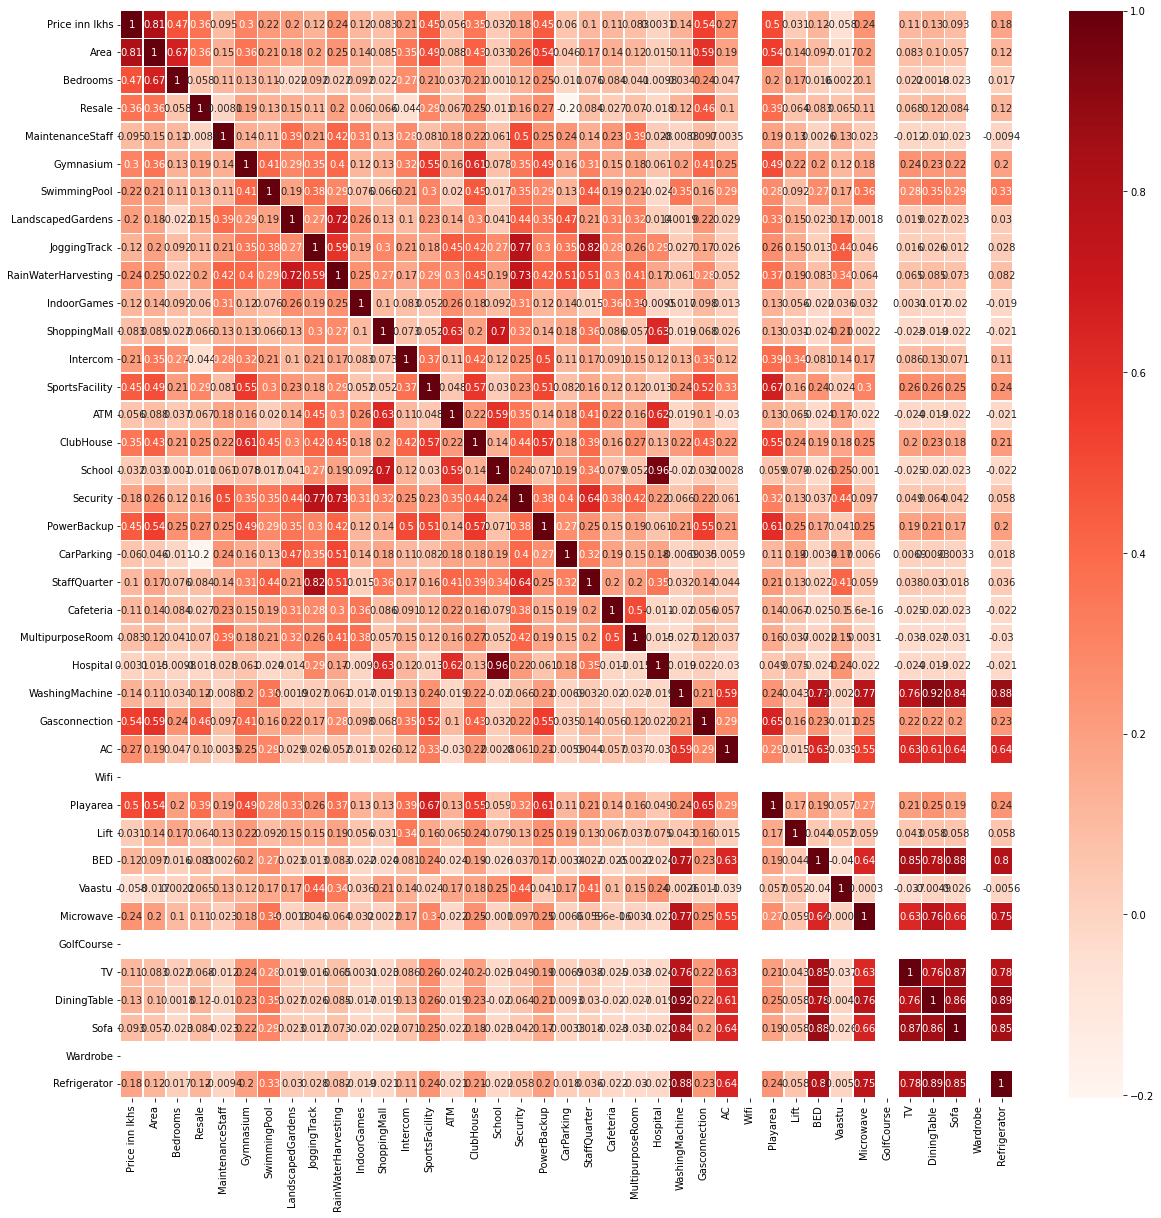

In [18]:
fig3 = plt.subplots(figsize=(20,20))
fig3 = sns.heatmap(Delhi_df.corr(), cmap='Reds' , annot = True , linewidths=.5)
fig3

In [19]:
delhi_location = Delhi_df["Location"]
Delhi_df.drop(["Location"] , axis=1,inplace=True )

In [20]:
Delhi_df.drop(["MaintenanceStaff", "Wifi","SwimmingPool","LandscapedGardens","ShoppingMall","SportsFacility","ATM","ClubHouse","StaffQuarter","Cafeteria","MultipurposeRoom","WashingMachine","BED","Microwave","DiningTable","Wardrobe","Sofa","Refrigerator","GolfCourse","TV"],axis=1,inplace=True)
Delhi_df.replace(9,np.nan,inplace=True)
Delhi_df.head(9) 


,Price inn lkhs,Area,Bedrooms,Resale,Gymnasium,JoggingTrack,RainWaterHarvesting,IndoorGames,Intercom,School,Security,PowerBackup,CarParking,Hospital,Gasconnection,AC,Playarea,Lift,Vaastu
0,105.0,1200,2,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,60.0,1000,3,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,150.0,1350,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.0,435,2,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,58.0,900,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,158.0,1800,4,1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
6,154.0,1500,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,135.0,1800,3,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,65.0,1000,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
Delhi_df["Price inn lkhs"].head(5)

0    105.0
1     60.0
2    150.0
3     25.0
4     58.0
Name: Price inn lkhs, dtype: float64

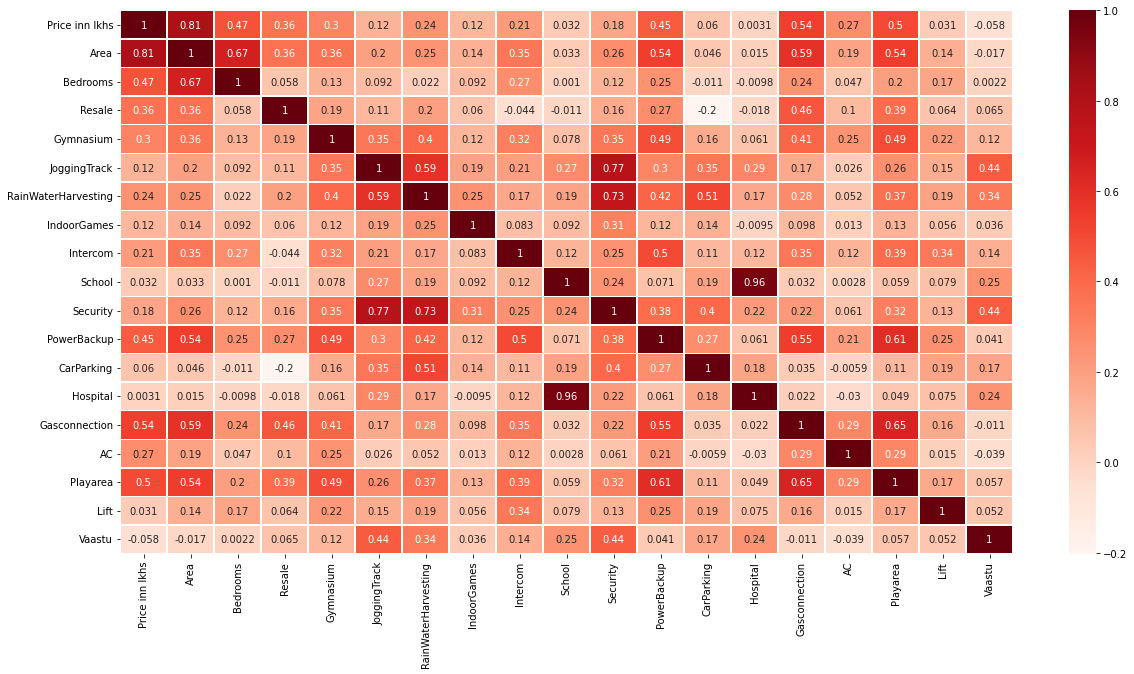

In [22]:
fig = plt.subplots(figsize=(20,10))
fig = sns.heatmap(Delhi_df.corr(), cmap='Reds' , annot = True , linewidths=.5)
fig

In [23]:
Delhi_df.columns

Index(['Price inn lkhs', 'Area', 'Bedrooms', 'Resale', 'Gymnasium',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'Intercom',
       'School', 'Security', 'PowerBackup', 'CarParking', 'Hospital',
       'Gasconnection', 'AC', 'Playarea', 'Lift', 'Vaastu'],
      dtype='object')

In [24]:
f_col = ['Area' , 'Bedrooms', 'PowerBackup', 'Gasconnection' , 'Playarea' , 'AC' ]

x = Delhi_df[f_col]
#x=x.values
y=Delhi_df['Price inn lkhs']
#y = y.values 


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lgr=LinearRegression(fit_intercept=True)
model_1=lgr.fit(x_train,y_train)
prediction=lgr.predict(x_test)


In [26]:
print(round(r2_score(y_test,prediction)*100, 2) , "%")

80.41 %


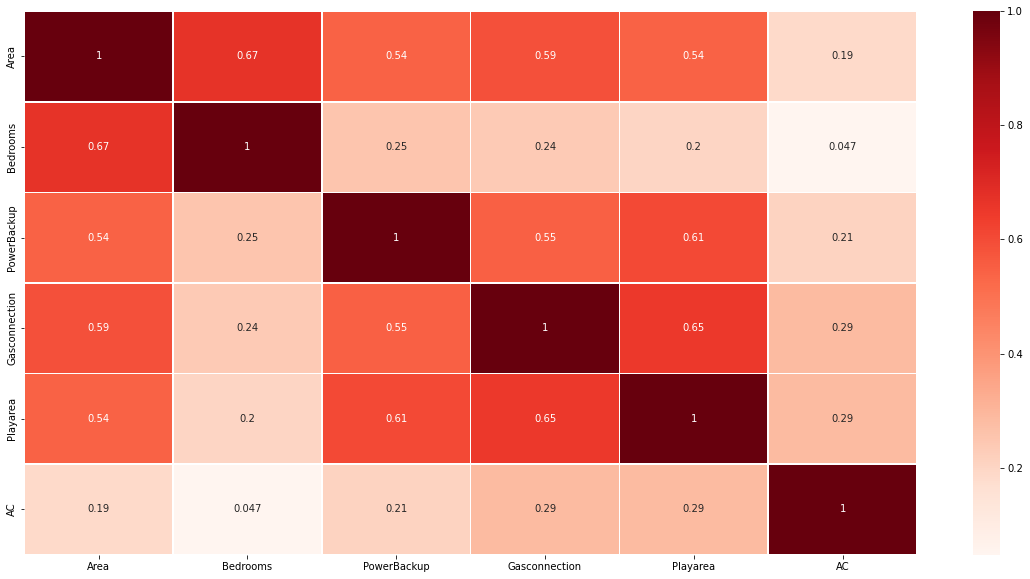

In [39]:
fig4 = plt.subplots(figsize=(20,10))
fig4 = sns.heatmap(x.corr(), cmap='Reds' , annot = True , linewidths=.5)
fig4

In [28]:
Delhi_df["Gasconnection"].unique()

array([1., 0.])

In [29]:
sorted(Delhi_df["Bedrooms"].unique())

[1, 2, 3, 4, 5]

In [30]:
Delhi_df["AC"].unique()

array([0., 1.])

In [31]:
print(x_test.shape , x_train.shape , y_train.shape , y_test.shape)

(401, 6) (1601, 6) (1601,) (401,)


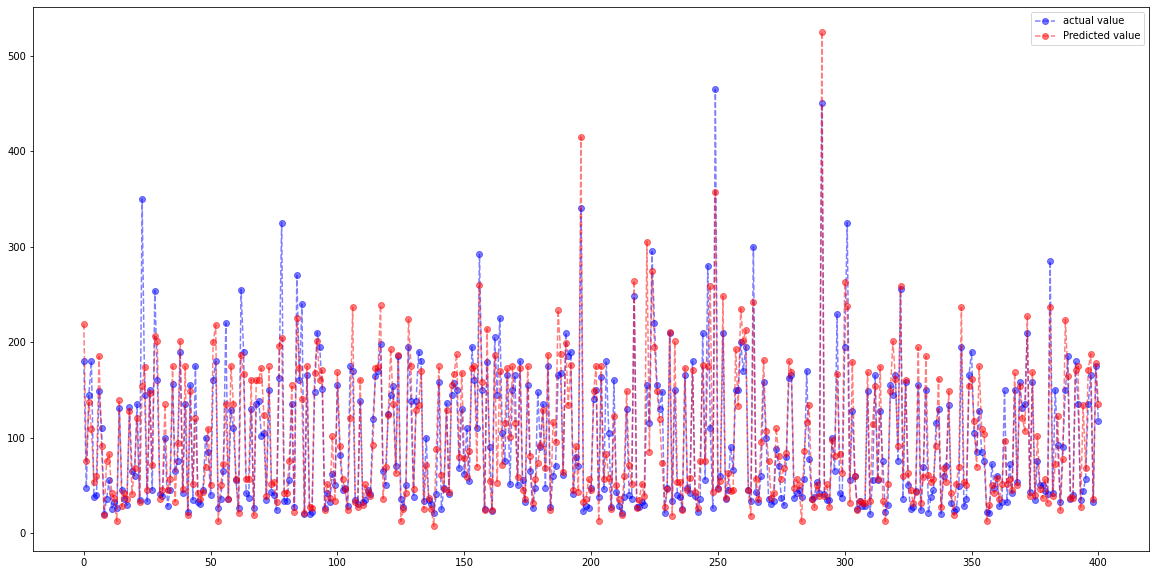

In [36]:
fig = plt.subplots(figsize=(20,10))
fig = plt.plot(range(len(y_test)), y_test, linestyle='--', marker='o' , color='blue' , alpha = 0.5  , label = "actual value")
fig = plt.plot(range(len(prediction)), prediction, linestyle='--', marker='o' , color='red' , alpha =0.5 , label = "Predicted value")
plt.legend()
fig